# **DEEP LERANING LAB WORK - 2**

**Importing the Libraries**

In [1]:
import numpy as np   #array implementation in python
import matplotlib.pyplot as plt   #ploting

np.set_printoptions(suppress=True, precision=4)

**Making a Numpy arrray**

In [2]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)  # array of numpy

y = np.array([[0],
              [0],
              [0],
              [1]], dtype=float)

print("X shape:", X.shape)   #(samples,features)
print("y shape:", y.shape)   #(samples,features)


X shape: (4, 2)
y shape: (4, 1)


**Scatter Plot**

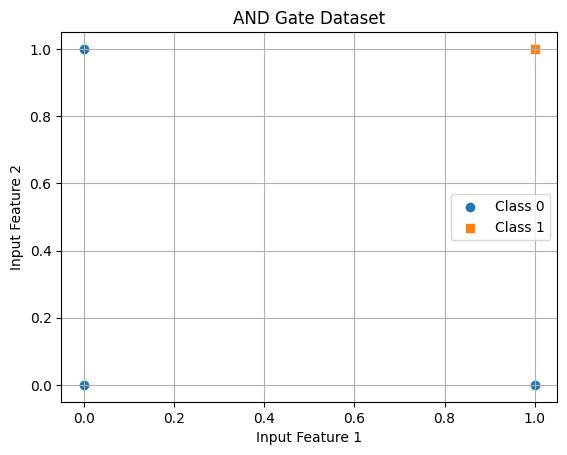

In [21]:
plt.figure()
plt.scatter(X[y.flatten() == 0][:, 0],
            X[y.flatten() == 0][:, 1],
            marker='o',
            label='Class 0')

plt.scatter(X[y.flatten() == 1][:, 0],
            X[y.flatten() == 1][:, 1],
            marker='s',
            label='Class 1')

plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
plt.title("AND Gate Dataset")
plt.legend()
plt.grid(True)
plt.show()

**Using ReLU,TaHN,Sigmoid function**

In [3]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def tanh(z):
    return np.tanh(z)   #Adds non-linearity

def tanh_derivative(z):    #backpropagation
    return 1 - np.tanh(z)**2

def sigmoid(z):
    return 1 / (1 + np.exp(-z))  #Converts values to range (0,1)

Handekking log(0) or -ive infinite value

In [4]:
def binary_cross_entropy(y_true, y_pred, eps=1e-8):
    y_pred = np.clip(y_pred, eps, 1 - eps) # Prevent log(0) by clipping predictions
    return -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))  # Compute binary cross entropy loss


**Making the layers and using sigmoid and other function**

In [5]:
def forward_pass(X, W1, b1, W2, b2):
    z1 = X @ W1 + b1   # first layer
    a1 = tanh(z1)
    z2 = a1 @ W2 + b2   # second layer
    y_hat = sigmoid(z2)

    cache = {"z1": z1, "a1": a1, "z2": z2, "y_hat": y_hat}
    return y_hat, cache

In [12]:
def backward_pass(X, y, cache, W2):
    m = X.shape[0]   # number of samples

    z1, a1, y_hat = cache["z1"], cache["a1"], cache["y_hat"]

    dz2 = (y_hat - y) / m
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = dz2 @ W2.T
    dz1 = da1 * tanh_derivative(z1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

**Traning the Model**

In [13]:
def train_mlp(X, y, hidden_size=5, lr=0.05, epochs=4000, seed=1, print_every=500):
    np.random.seed(seed)

    W1 = np.random.randn(X.shape[1], hidden_size) * 0.5
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, 1) * 0.5
    b2 = np.zeros((1, 1))

    losses = []

    for epoch in range(1, epochs+1):

        # Forward
        y_hat, cache = forward_pass(X, W1, b1, W2, b2)
        loss = binary_cross_entropy(y, y_hat)
        losses.append(loss)

        # Backward
        grads = backward_pass(X, y, cache, W2)

        # Update
        W1 -= lr * grads["dW1"]
        b1 -= lr * grads["db1"]
        W2 -= lr * grads["dW2"]
        b2 -= lr * grads["db2"]

        if epoch % print_every == 0 or epoch == 1:
            print(f"Epoch {epoch:4d}  |  Loss: {loss:.6f}")

    params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return params, losses


**Loss**

In [14]:
params, losses = train_mlp(X, y)

Epoch    1  |  Loss: 0.822696
Epoch  500  |  Loss: 0.114642
Epoch 1000  |  Loss: 0.034036
Epoch 1500  |  Loss: 0.017481
Epoch 2000  |  Loss: 0.011254
Epoch 2500  |  Loss: 0.008131
Epoch 3000  |  Loss: 0.006293
Epoch 3500  |  Loss: 0.005097
Epoch 4000  |  Loss: 0.004262


**Plotting a curve**

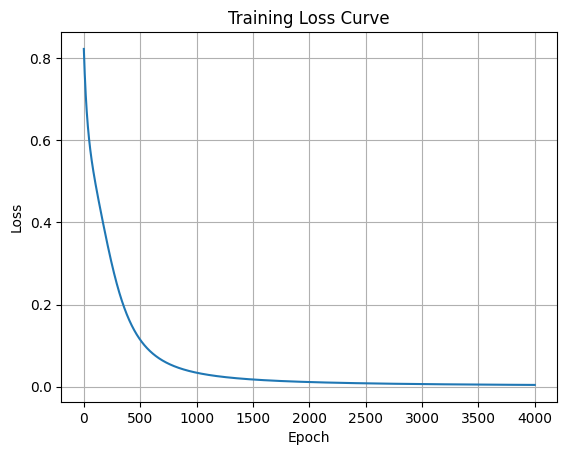

In [15]:
plt.figure()
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

**Final Prediction**

In [16]:
W1, b1, W2, b2 = params["W1"], params["b1"], params["W2"], params["b2"]

y_hat, _ = forward_pass(X, W1, b1, W2, b2)
pred = (y_hat >= 0.5).astype(int)

print("\nFinal Probabilities:\n", y_hat)
print("\nPredicted Labels:\n", pred)
print("\nTrue Labels:\n", y.astype(int))


Final Probabilities:
 [[0.    ]
 [0.0035]
 [0.0054]
 [0.992 ]]

Predicted Labels:
 [[0]
 [0]
 [0]
 [1]]

True Labels:
 [[0]
 [0]
 [0]
 [1]]
